<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/ThreePhaseVoltages_PhasorDiagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Phasor Diagram for 3-Phase Positive and Negative Sequences</h1></b>

Dr. Bingsen Wang

2/22/2025
</center>

#Python Code


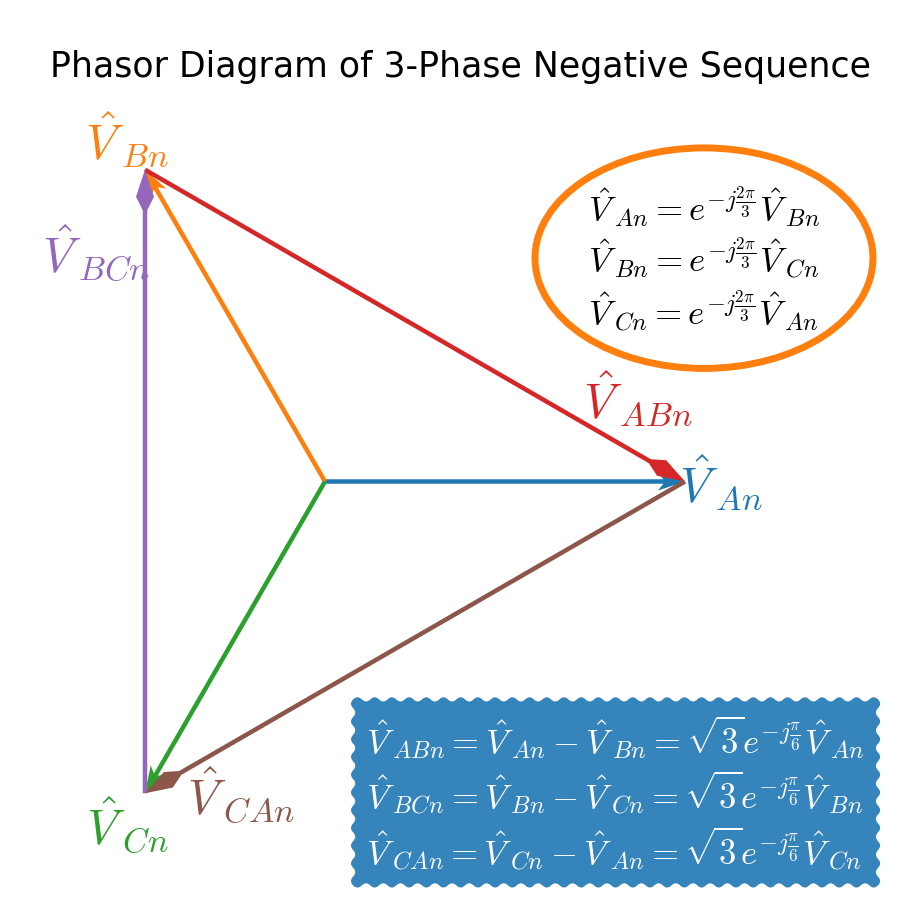

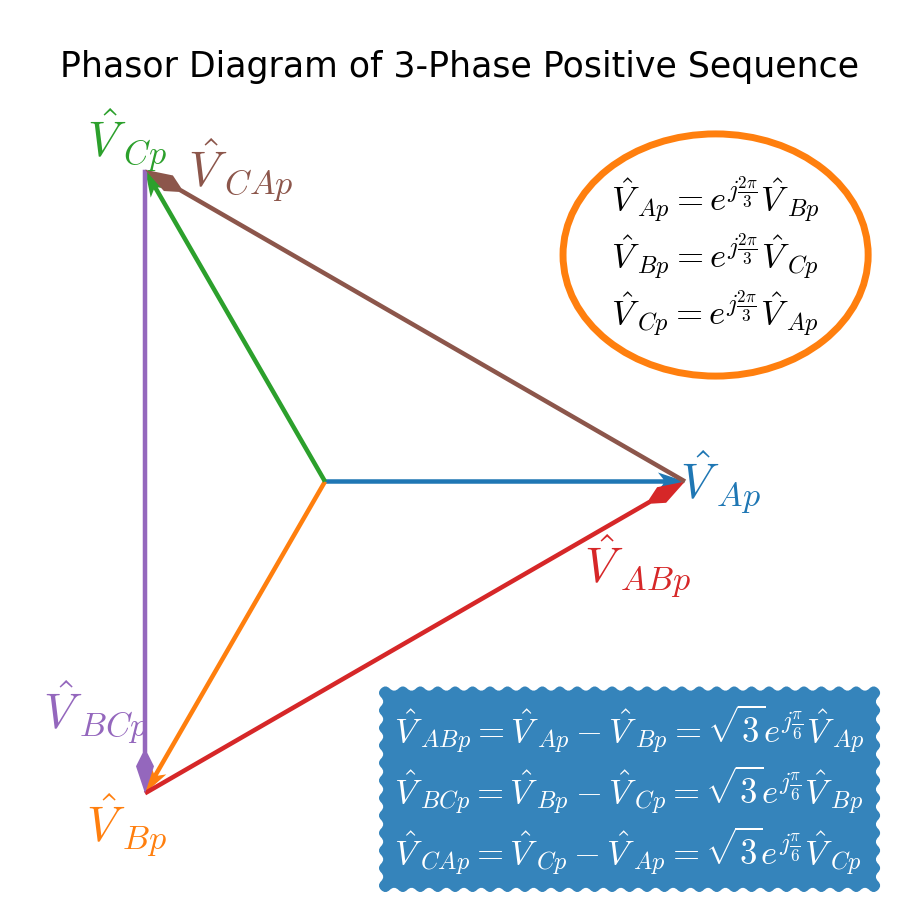

In [1]:
from matplotlib import pyplot,patches,cm
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})
import numpy as np
vln = [[.8*np.exp((-1)**i*2j*k*np.pi/3) for k in range(3)] for i in range(2)]
vll = [[vln[i][k]-vln[i][(k+1)%3] for k in range(3)] for i in range(2)]
clst = list(cm.tab10.colors) #colors list
for i in range(2):
  pn,s = ['n','p'][i],['-',''][i]
  fig = pyplot.figure(figsize=([9,9]))
  ax= fig.add_axes([0,0,1,1],xlim=[-.7,1.3],ylim=[-.95,1.05]); ax.axis('off')
  ax.text(.3,.9,r'Phasor Diagram of 3-Phase '+['Nega','Posi'][i]+'tive Sequence',size=25,ha='center')
  [ax.add_patch(patches.FancyArrow(0,0,vln[i][k].real,vln[i][k].imag,width=0.01,
          head_width=.04,length_includes_head=True,ec=clst[k],overhang=.2,fc=clst[k],lw=0)) for k in range(3)]
  [ax.text(1.1*vln[i][k].real,1.1*vln[i][k].imag,[r'$\hat V_{A'+pn+'}$',r'$\hat V_{B'+pn+'}$',r'$\hat V_{C'+pn+'}$'][k],
          c=clst[k],size=35,ha='center',va='center') for k in range(3)]
  [ax.add_patch(patches.FancyArrow(vln[i][(k+1)%3].real,vln[i][(k+1)%3].imag,vll[i][k].real,vll[i][k].imag,width=0.01,
        head_width=.04,length_includes_head=True,ec=clst[k], overhang=-.5,fc=clst[k+3],lw=0)) for k in range(3)]
  [ax.text((.9*vln[i][k]*np.exp((-1)**i*1j*np.pi/12)).real,(.9*vln[i][k]*np.exp((-1)**i*1j*np.pi/12)).imag,
          [r'$\hat V_{AB'+pn+'}$',r'$\hat V_{BC'+pn+'}$',r'$\hat V_{CA'+pn+'}$'][k],
          c=clst[k+3],size=35,ha='center',va='center') for k in range(3)]
  ax.text(1.1,.35,r'$\hat V_{A'+pn+'}=e^{'+s+r'j\frac{2\pi}{3}}\hat V_{B'+pn+'}$'+'\n'+
          r'$\hat V_{B'+pn+'}=e^{'+s+r'j\frac{2\pi}{3}}\hat V_{C'+pn+'}$'+'\n'+
          r'$\hat V_{C'+pn+'}=e^{'+s+r'j\frac{2\pi}{3}}\hat V_{A'+pn+'}$',
          size=25,ha='right',multialignment='left',c='k',bbox=dict(boxstyle='ellipse',pad=.1,fc='none',ec=clst[1],alpha=1,lw=5))
  ax.text(1.2,-.85,r'$\hat V_{AB'+pn+'}=\hat V_{A'+pn+'}-\hat V_{B'+pn+'}=\sqrt{3}e^{'+s+r'j\frac{\pi}{6}}\hat V_{A'+pn+'}$'+'\n'+
          r'$\hat V_{BC'+pn+'}=\hat V_{B'+pn+'}-\hat V_{C'+pn+'}=\sqrt{3}e^{'+s+r'j\frac{\pi}{6}}\hat V_{B'+pn+'}$'+'\n'+
          r'$\hat V_{CA'+pn+'}=\hat V_{C'+pn+'}-\hat V_{A'+pn+'}=\sqrt{3}e^{'+s+r'j\frac{\pi}{6}}\hat V_{C'+pn+'}$',
          size=25,ha='right',multialignment='left',c='w',bbox=dict(boxstyle='roundtooth',pad=.5,ec='none',fc=clst[0],alpha=.9,lw=3))
  fig.savefig('3phaseVoltages_PhasorDiagram_'+['nega','posi'][i]+'tive.png',dpi=600)